**Xây dựng cây quyết định và rừng cây trên dữ liệu Diabetes Prediction**

## **Import Lib**

In [1]:
import numpy as np #numerical computation 
import pandas as pd #data wrangling 
import matplotlib.pyplot as plt #plotting package 
#Next line helps with rendering plots 
%matplotlib inline 
import matplotlib as mpl #add'l plotting functionality 
mpl.rcParams['figure.dpi'] = 400 #high res figures 
import graphviz #to visualize decision trees 
import re
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV 

## **Import dataset**

In [2]:
df = pd.read_csv('../Dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Kiểm tra thông tin dữ liệu
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nStatistics:")
df.describe()

Shape: (100000, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes            

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
# Tiền xử lý dữ liệu
# Encoding categorical variables

# Gender: Female=0, Male=1, Other=2
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Smoking history encoding
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
}
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

# Kiểm tra missing values sau encoding
print("Missing values after encoding:")
print(df.isnull().sum())

Missing values after encoding:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
# Xem dữ liệu sau khi tiền xử lý
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [6]:
# Định nghĩa features và target
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 
            'bmi', 'HbA1c_level', 'blood_glucose_level']

X = df[features]
y = df['diabetes']

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 80000
Test set size: 20000


## **Mô hình Decision Tree Classifier**

### Xây dựng mô hình

In [7]:
# the tree will grow to a depth of at most 2 
dt = tree.DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


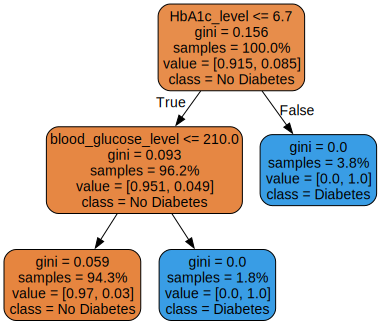

In [8]:
dot_data = tree.export_graphviz(dt, 
                out_file=None, 
                filled=True, 
                rounded=True, 
                feature_names=features,
                proportion=True, 
                class_names=['No Diabetes', 'Diabetes']) 
graph = graphviz.Source(dot_data) 
graph

### Tìm tham số tối ưu

In [9]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters 
dt = tree.DecisionTreeClassifier() #tree modal 
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', 
               n_jobs=None, refit=True, cv=4, verbose=1, 
               error_score=np.nan, 
               return_train_score=True) # cv is the best model. 
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


### Vẽ biểu đồ đánh giá mô hình

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Pht Technology\AppData\Local\Temp\ipykernel_17204\758487805.py:8: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
C:\Users\Pht Technology\AppData\Local\Temp\ipykernel_17204\758487805.py:12: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE testing scores')


Text(0, 0.5, 'ROC AUC')

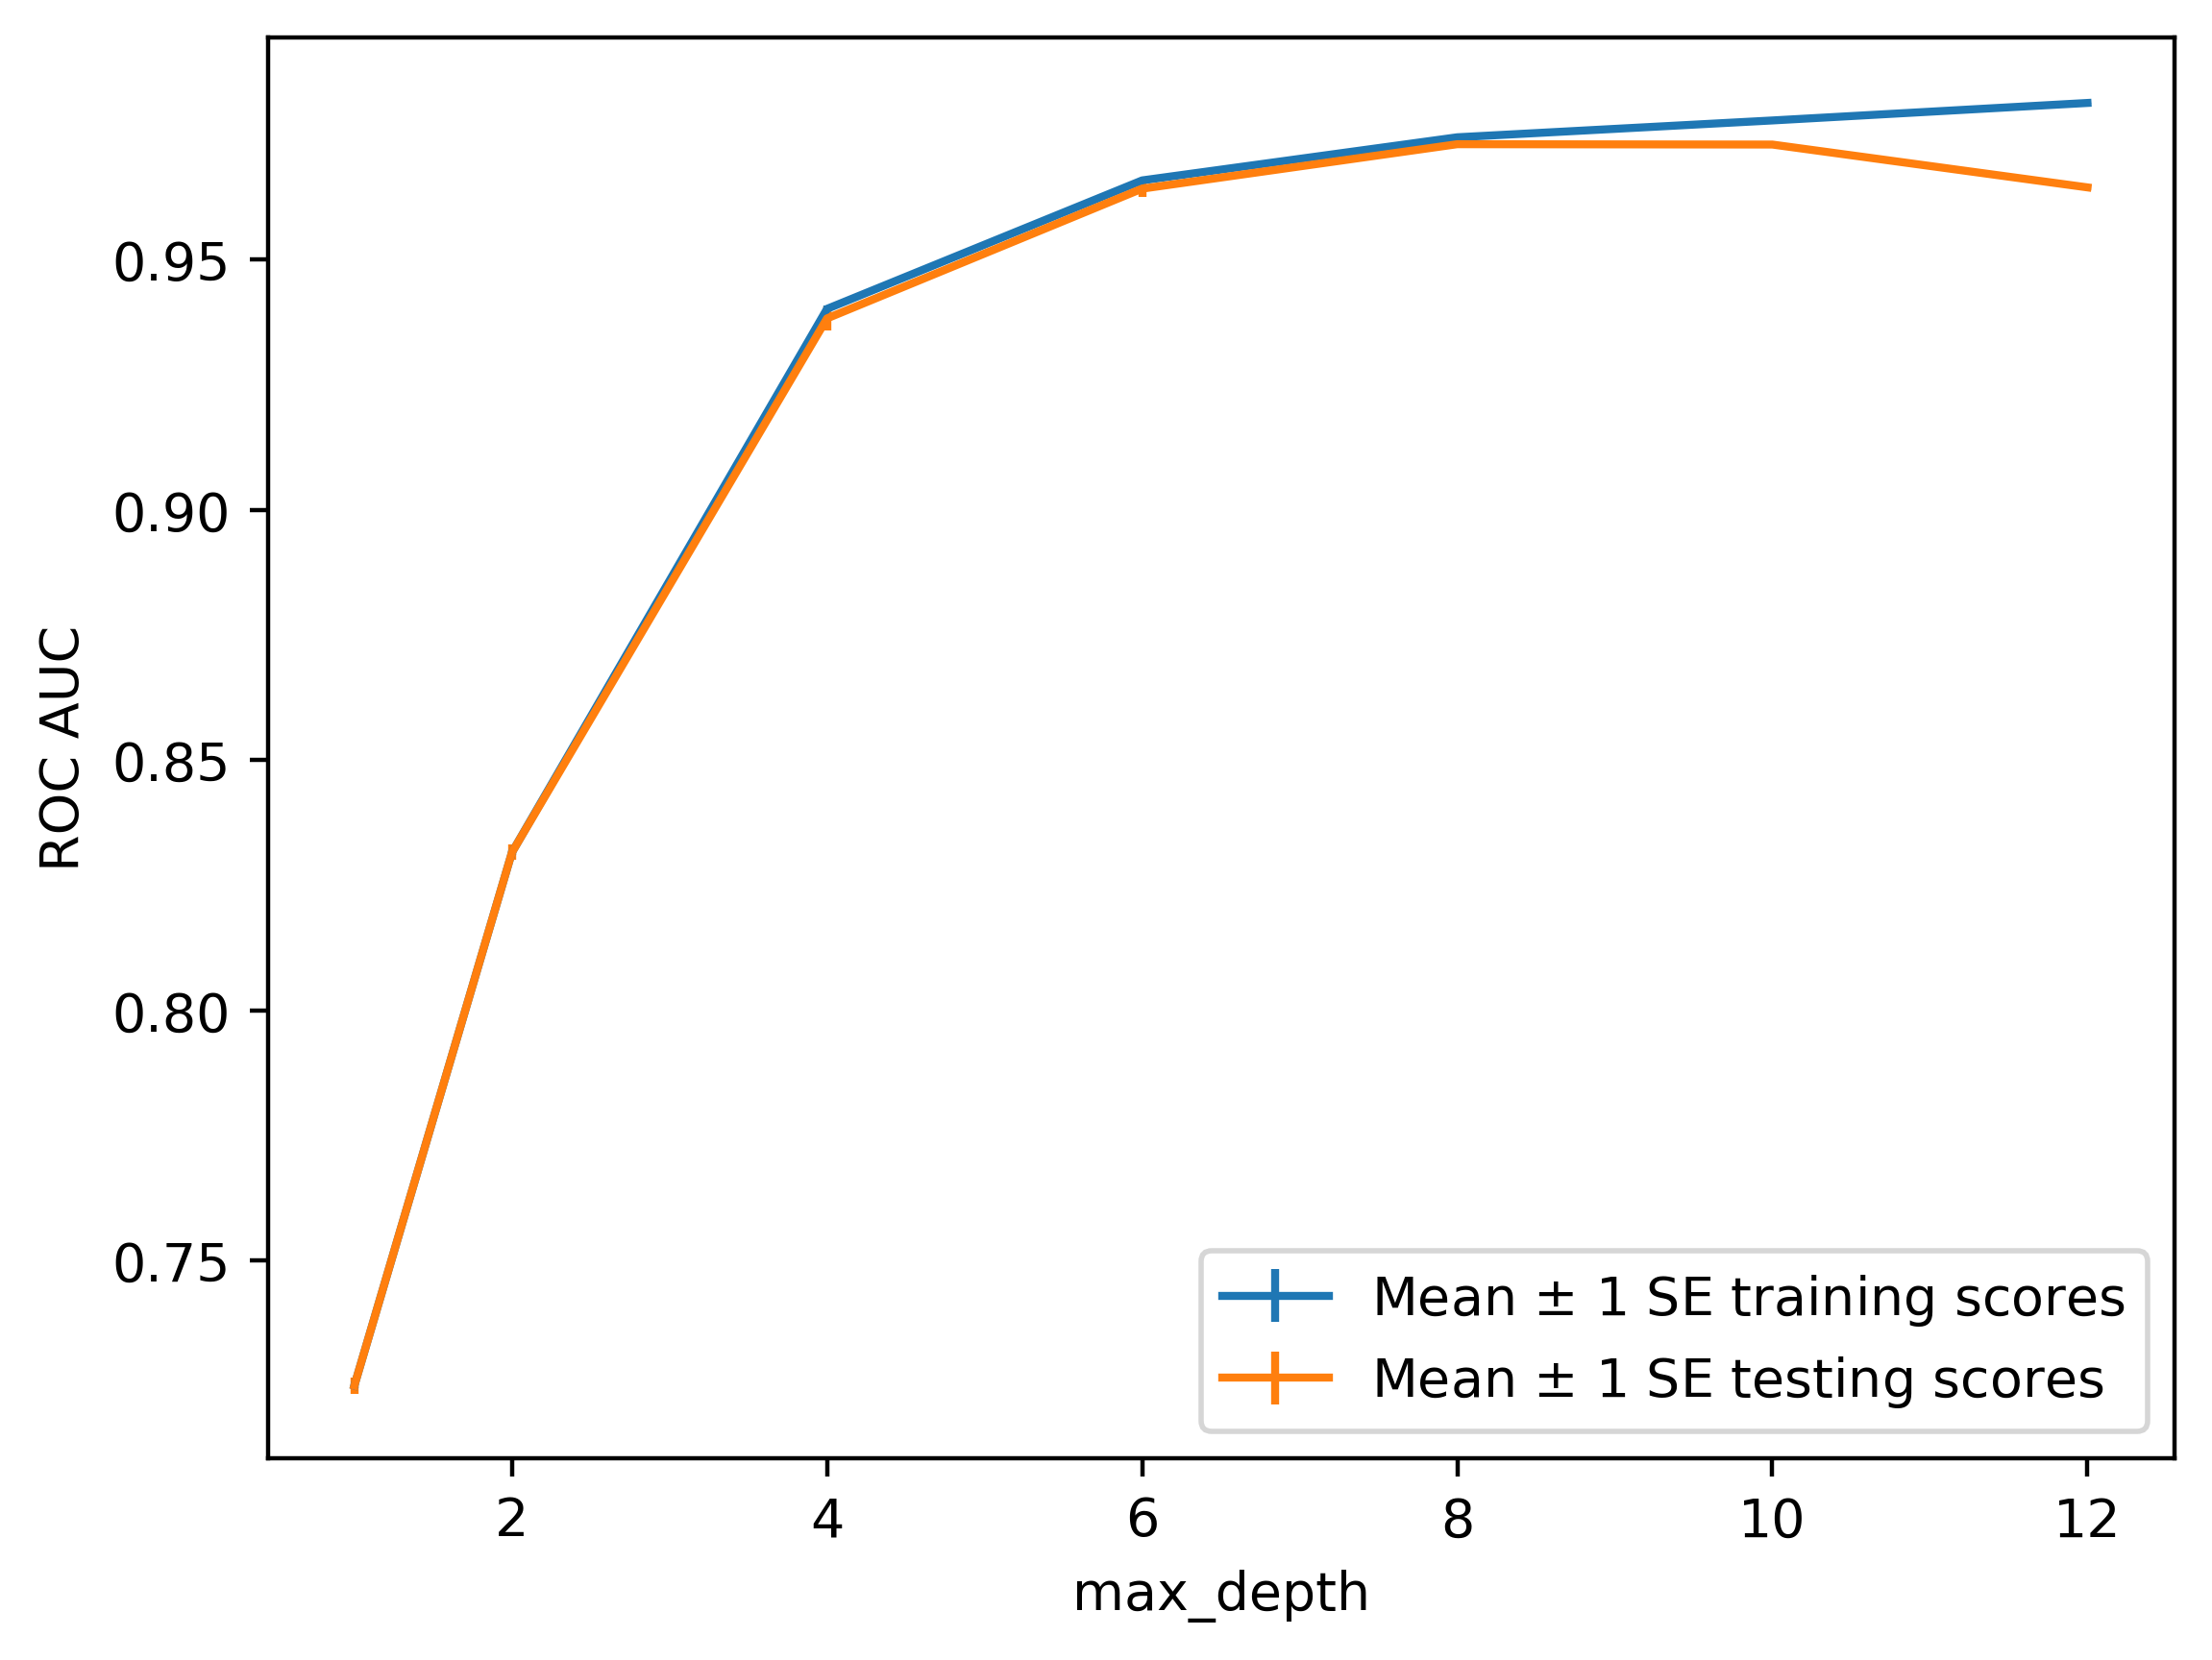

In [10]:
cv_results_df = pd.DataFrame(cv.cv_results_) 
#View the names of the remaining columns in the results DataFrame 
cv_results_df.columns 
ax = plt.axes() 
ax.errorbar(cv_results_df['param_max_depth'], 
            cv_results_df['mean_train_score'], 
            yerr=cv_results_df['std_train_score']/np.sqrt(4), 
            label='Mean $\pm$ 1 SE training scores') 
ax.errorbar(cv_results_df['param_max_depth'], 
            cv_results_df['mean_test_score'], 
            yerr=cv_results_df['std_test_score']/np.sqrt(4), 
            label='Mean $\pm$ 1 SE testing scores') 
ax.legend() 
plt.xlabel('max_depth') 
plt.ylabel('ROC AUC') 

## **RandomForestClassifier**

### Xây dựng mô hình

In [11]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier\
  (n_estimators=10, criterion='gini', max_depth=3, 
   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
   max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
   bootstrap=True, oob_score=False, n_jobs=None, 
   random_state=4, verbose=0, warm_start=False, class_weight=None) 

### **Tìm tham số tối ưu**

In [12]:
#a parameter  grid for  this  exercise in order  to search  the numbers  of trees, ranging from 10 to 100 by 10s 
rf_params_ex = {'n_estimators':list(range(10,110,10))} 
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, 
                        scoring='roc_auc', n_jobs=None, 
                        refit=True, cv=4, verbose=1, 
                        error_score=np.nan, 
                        return_train_score=True) 
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,20


### Vẽ biểu đồ đánh giá mô hình

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Pht Technology\AppData\Local\Temp\ipykernel_17204\1761324305.py:12: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


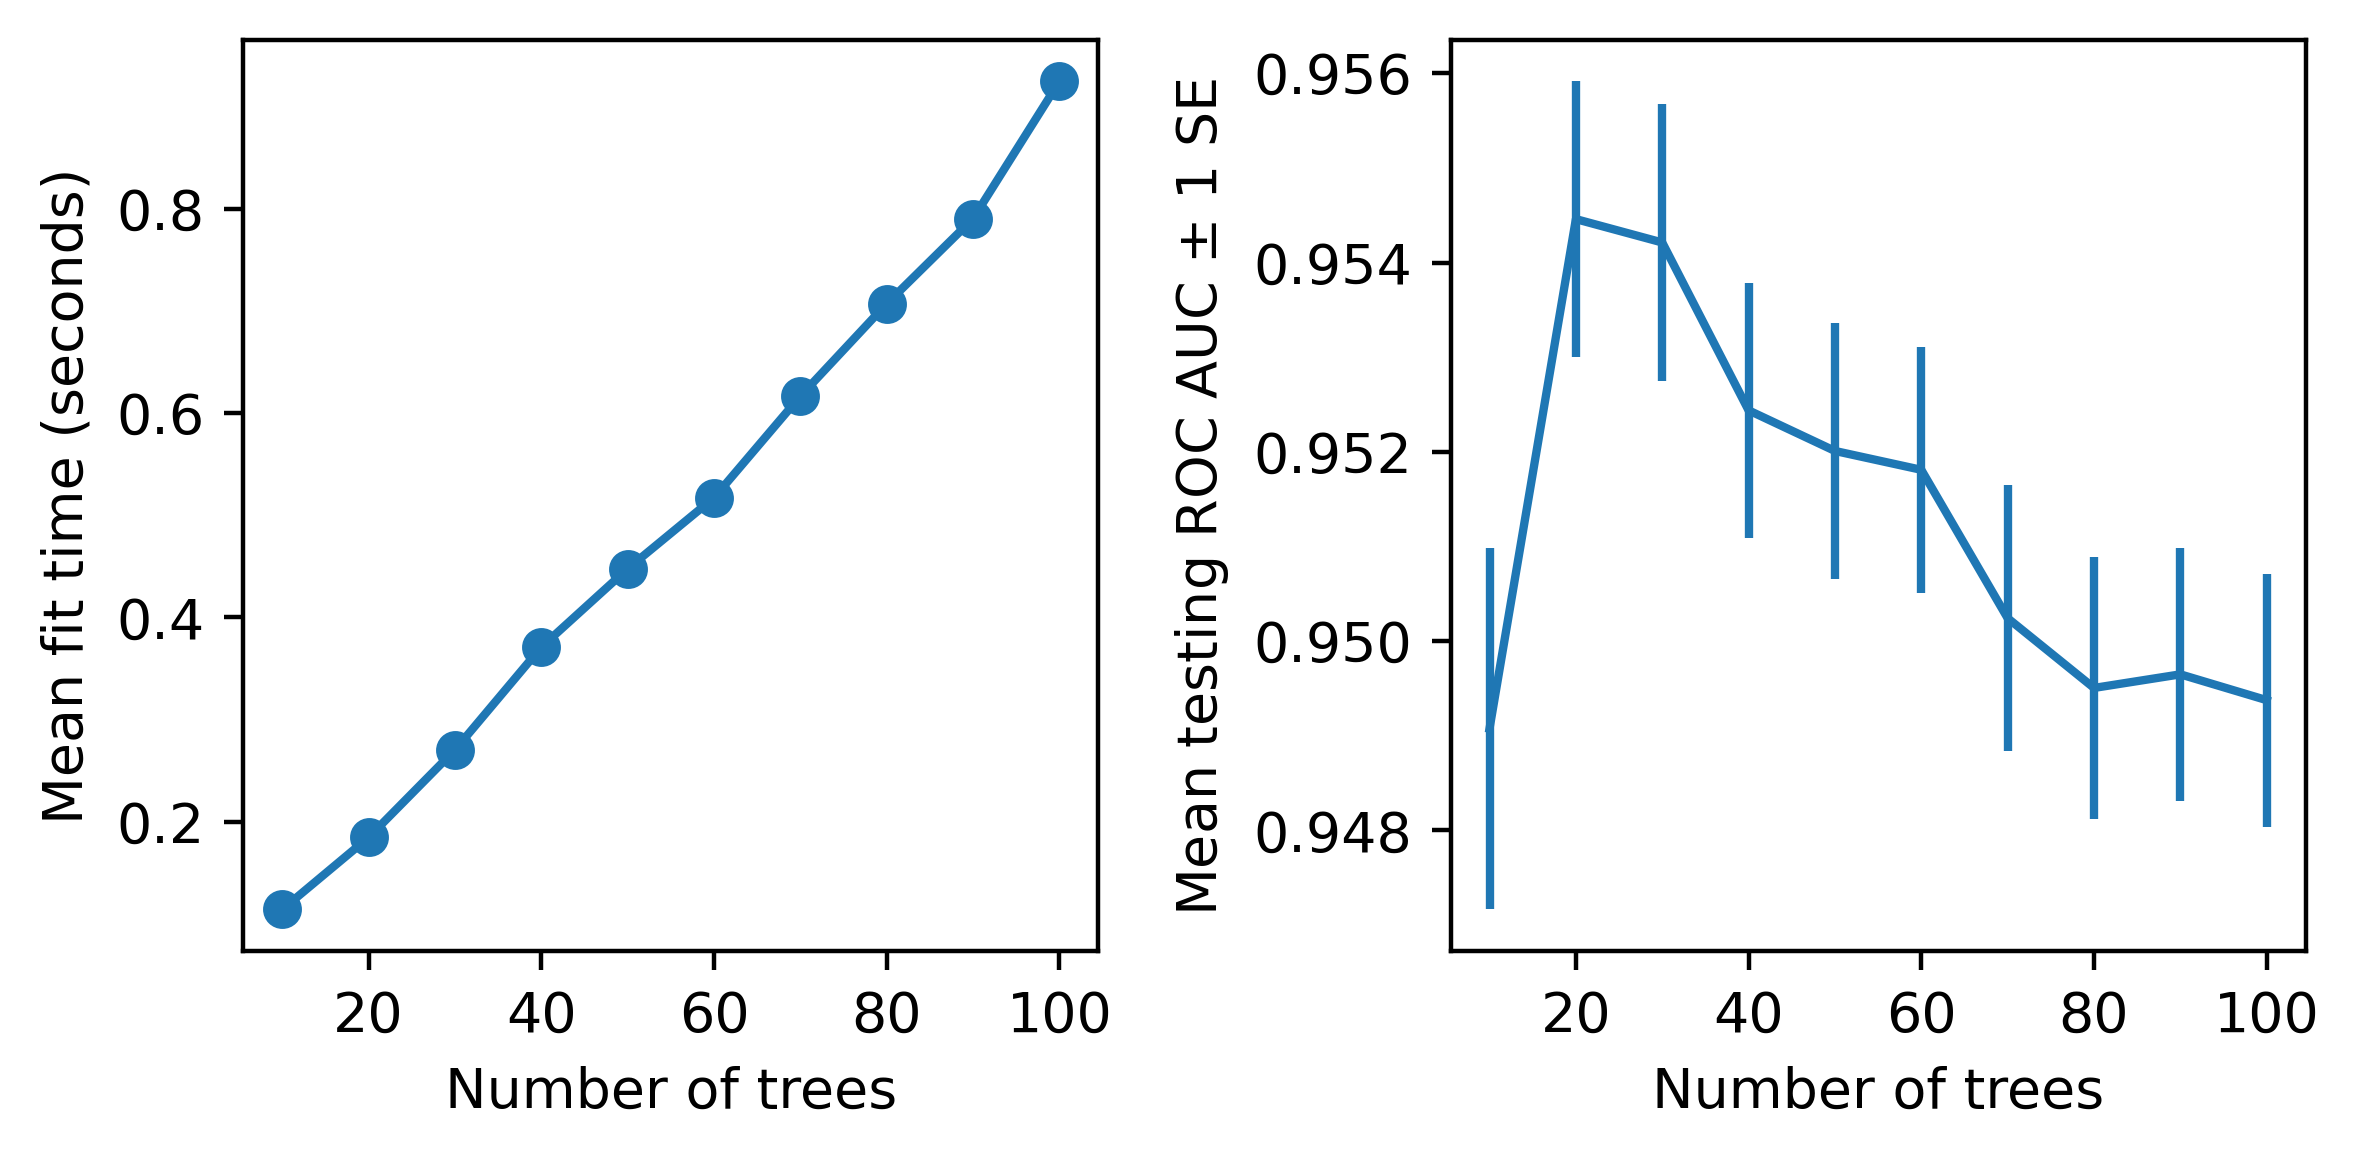

In [13]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3)) 
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'], 
            cv_rf_ex_results_df['mean_fit_time'], 
            '-o') 
axs[0].set_xlabel('Number of trees') 
axs[0].set_ylabel('Mean fit time (seconds)') 
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'], 
                cv_rf_ex_results_df['mean_test_score'], 
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4)) 
axs[1].set_xlabel('Number of trees') 
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ') 
plt.tight_layout()

### **Xem tham số tốt nhất của rừng cây**

Best parameters: {'n_estimators': 20}


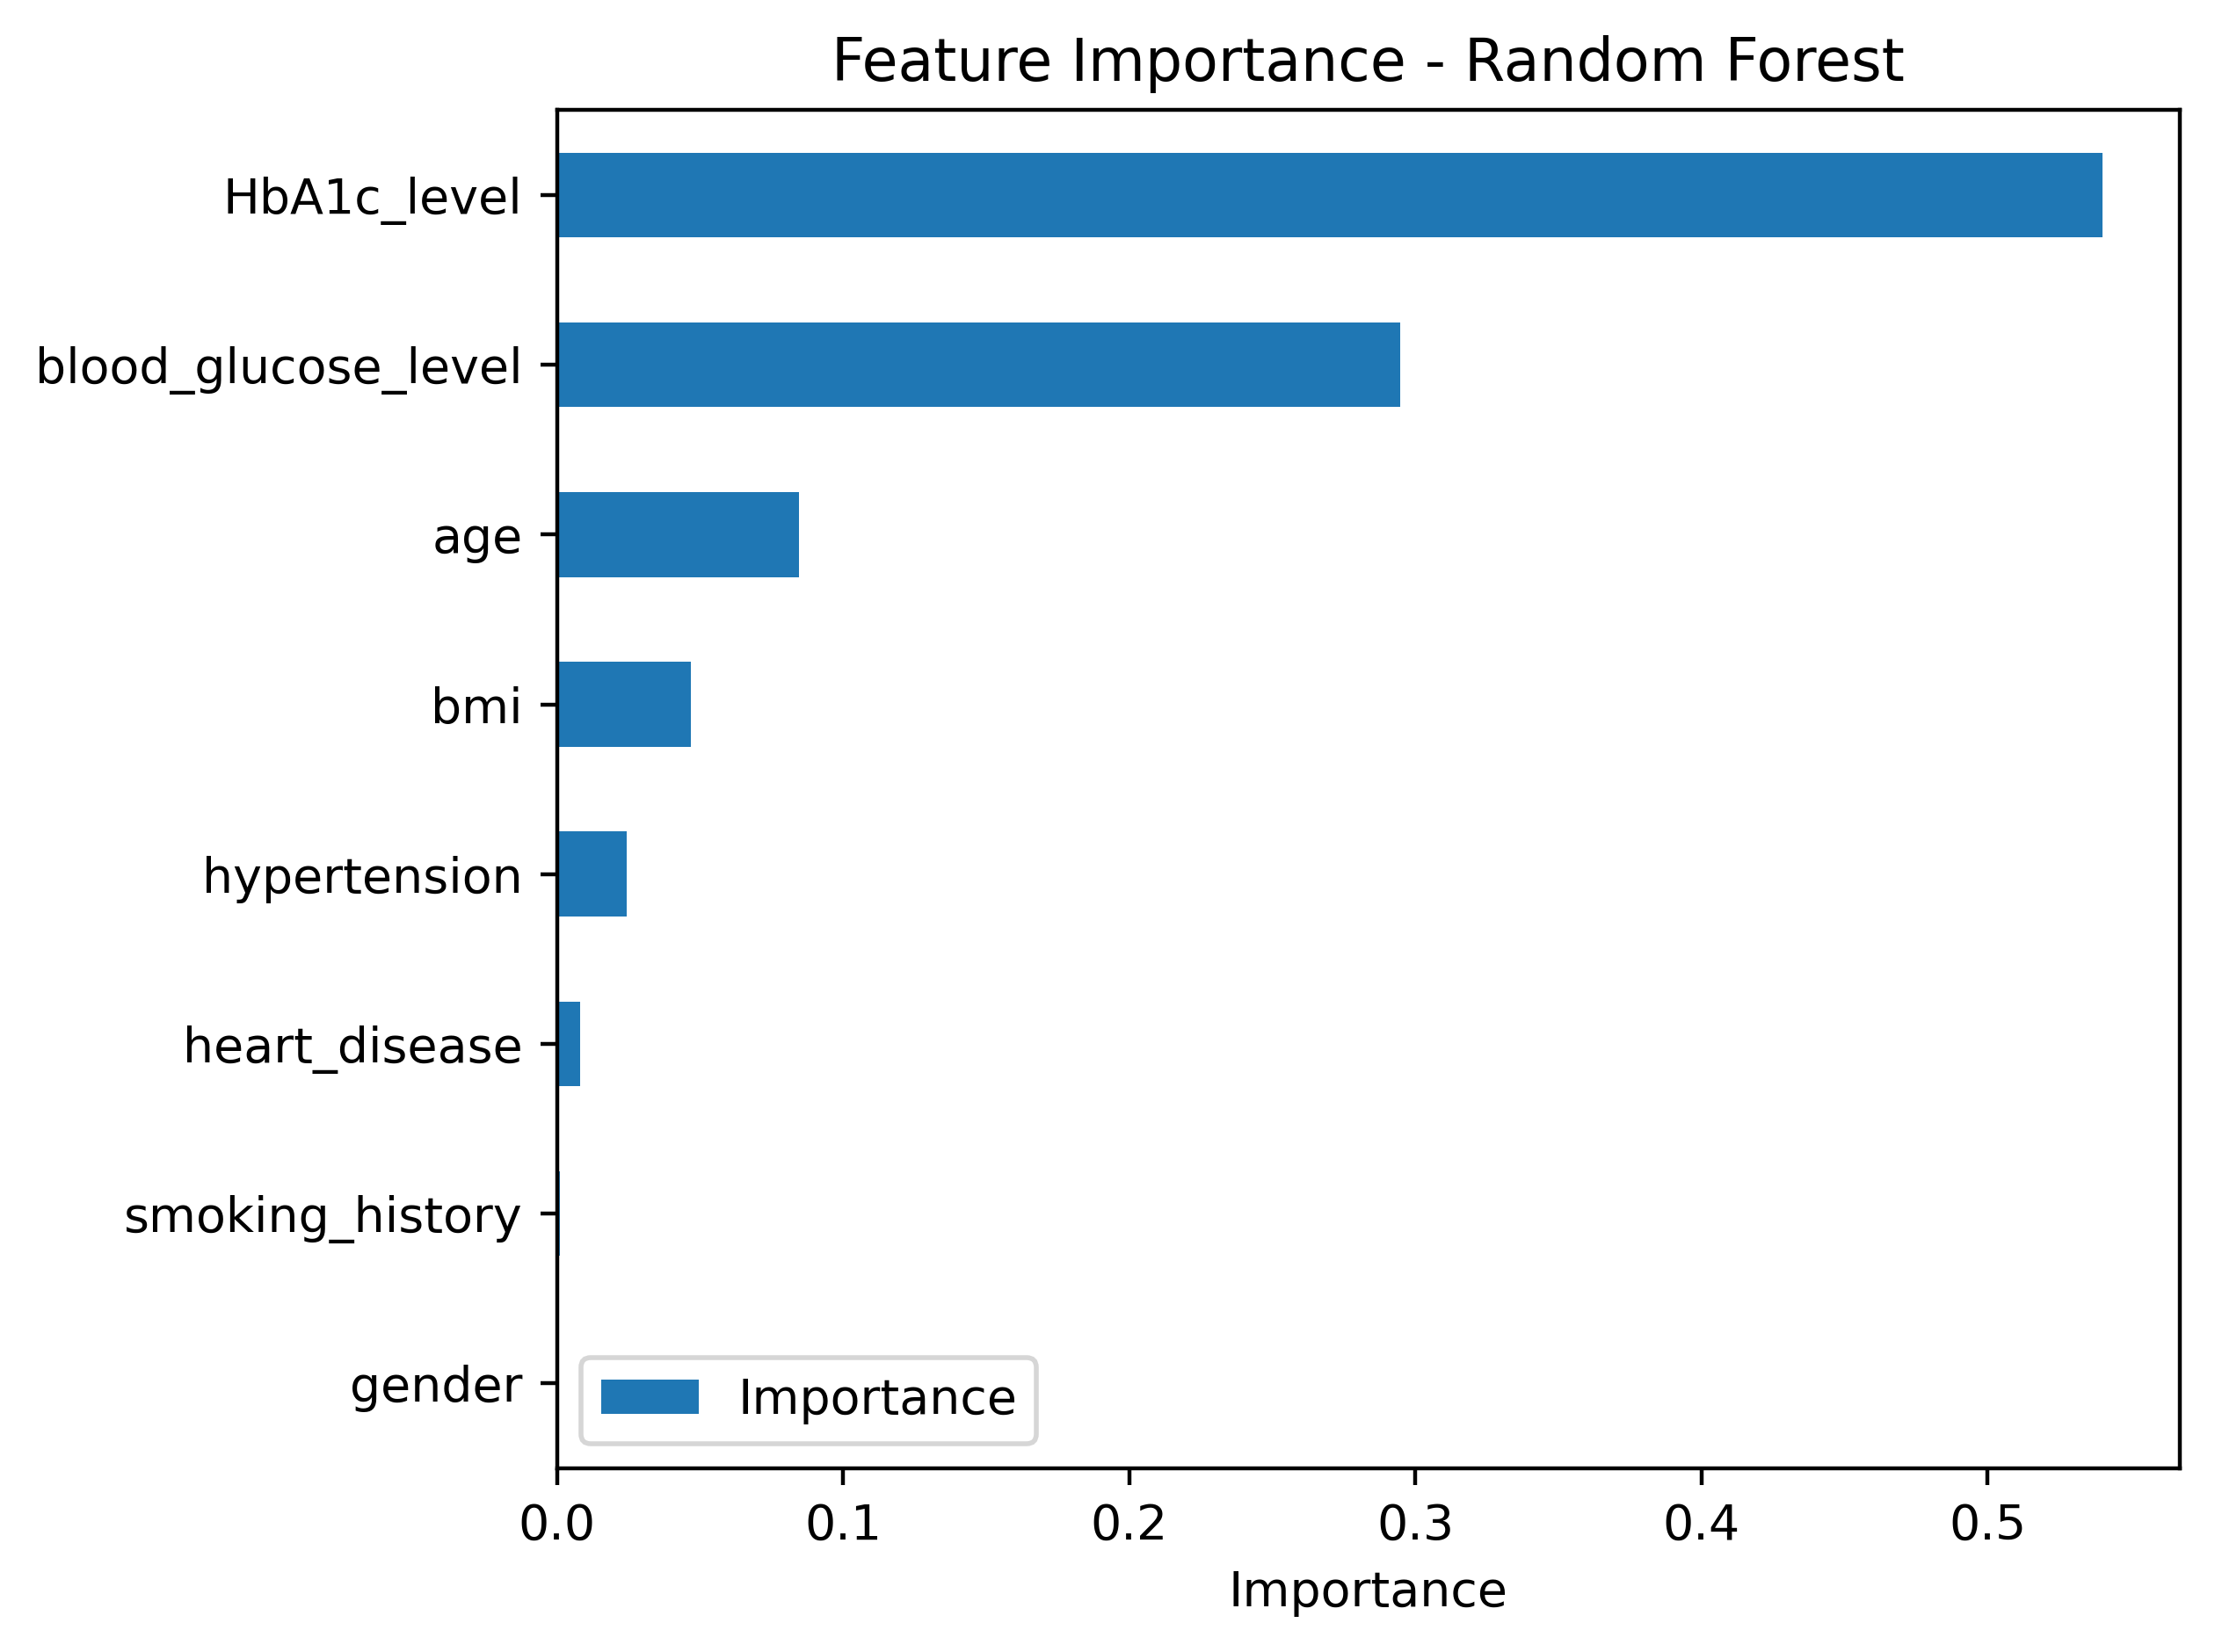

In [14]:
# Xem tham số tốt nhất
print("Best parameters:", cv_rf_ex.best_params_)

# Feature importance
feat_imp_df = pd.DataFrame({ 
    'Importance': cv_rf_ex.best_estimator_.feature_importances_}, 
    index=features) 
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()